You've heard of the simple linear regression:

$
y = b_{0}+b_{1}x
$

You've seen the multiple linear regression:

$
y = b_{0}+b_{1}x_{1}+\ldots+b_{n}x_{x}
$

Now, prepare yourself for the...


# Logistic Regression

We employ this bad boy when we can see a clear correlation in the data, but instead of predicting a value, we want to know some probability of something belonging to some category. For example, would a person within *this* demographic buy *this* product? The difference from the linear regression models doesn't stop there. We replace the $y$ in the lienar equation with a sigmoid function:

$
\ln{\frac{p}{1-p}} = b_{0}+b_{1}x,
$

where $p$ is the probabilities we are predicting that something will be classified as one thing over another.

## Let's load the data and get a feel for what we're doing

We will need to bring the data in and pre-process it for machine learning.

In [1]:
# invite our friends
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the goods
df = pd.read_csv('data/Social_Network_Ads.csv')

# INSPECTION!!!
print(df.info(), '\n\n', df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB
None 

     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


#### What was the question?

So the story here is that we want to predict people that will purchase a product based on the data shown above. If we advertise the product on social media, will a guy in his thirties, who makes $42k a year, be likely to buy it?

We can see from the above information that we have, for each person in an observation:

+ **User ID**: not much good for what we're trying to predict, let's drop that
+ **Gender**: mayhaps a lady likes the prduct more, or we are marketing a product for the gents? Let's keep this
+ **Age**: Maybe folks in their teens don't quite *get* what the product is, but their parents do. We'll keep this.
+ **EstimatedSalary**: it could be a luxury item, or a knock off. This matters to some folks in certain income brackets. We're gonna keep this too.
+ **Purchased**: Whether or not they bought the product, and what we are predicting. We'll keep this, duh!

#### Now, let me be clear.

For the sake of this demostration we are going to pretend that we are marketing folks and we are working for the Friggin' Sweet Moon Chair company, and they have just come out with their brand new Friggin' Sweet Lunar Crater chair, or *The Crater* for short. This thing costs a ridiculous amount of money, so we want to see who is going to buy this bad ass chair.

In [3]:
# separate the data into response and predictor (ensure X is a matrix, not a vector)
X = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values

### Let's split!

Now that we have the predictors and the response separated we need to split the data into training and test sets.

In [4]:
# split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### A banana for scale

Do we want to perform feature scaling? Hell yes we do. We want this to accurately predict whether or not somebody wants to put the Moon to their cheeks! Look at the Estimated Salary values and compare that with the Age values. A few orders of magnitude off, and we don't want the salary to dominate the model. So let's scale our features.

In [5]:
# apply feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/home/nellac77/anaconda3/envs/py3-learn/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
# did they scale? I mean, of course they did, but let's just look...
print('X Train Set\n', X_train[0:5], '...\n\n', 'X Test Set\n', X_test[0:5], '...')

X Train Set
 [[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]] ...

 X Test Set
 [[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]] ...


### Let's build this model

In [7]:
# fitting the logistic regression model to the training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Ok, so we fit the model. Now let's predict the test set.

In [8]:
# predicting the test set
y_pred = classifier.predict(X_test)

### Evaluation time

So we are going to evaluate our model's prediction of the test set by inspecting a confusion matrix and visualizing the results.

In [9]:
# evaluate with confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) # first arg is the ground truth, then the predicted

In [10]:
# this is not mine! Mad props to shaypal5
# https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
# this function classes up the confusion matrix
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # commenting out so I don't see two matrices below the cell I call this in
    #return fig

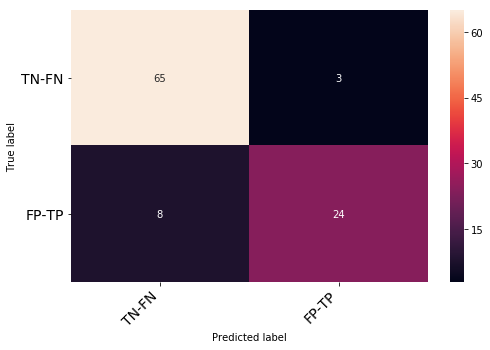

In [11]:
print_confusion_matrix(cm, [['TN', 'FP'], ['FN', 'TP']], figsize=(8,5))

Let's have a look at the model visually now.

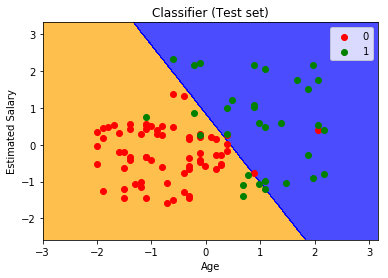

In [12]:
_ = plt.clf()
# plot the model, stay with me...
# Thanks, Hadeline! (https://www.udemy.com/machinelearning/)
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

_ = plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.7, cmap = ListedColormap(('orange', 'blue')))
_ = plt.xlim(X1.min(), X1.max())
_ = plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

_ = plt.title('Classifier (Test set)')
_ = plt.xlabel('Age')
_ = plt.ylabel('Estimated Salary')
_ = plt.legend()

#### Let's interpret this thing

